# GRIPMAY21 

# Task 1
# Prediction using Supervised ML

# Author : Harvi Patel
    
# Task Objective : Predict the percentage of a student based on the number of study hours.


What is Supervised ML?

Supervised ML is when you can train your model using Labelled Dataset.


Now what is Labelled Dataset?

A labelled dataset is a dateset which has an input parameter and an output parameter.


The dataset which we will be using is this task is a labelled dataset.


This is a Linear Regression based problem.



In [1]:
# We will start with importing all the required libraries

import pandas as pd
import numpy as np

In [2]:
# Let's import the data we want to analyse

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# Now we will read the data 
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


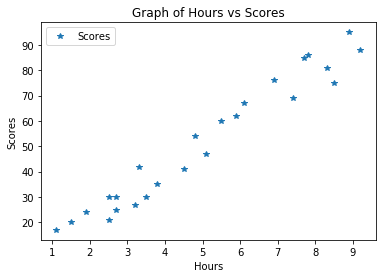

In [3]:
#For plotting the data we need to import the matplotlib library
import matplotlib.pyplot as plt

# Let's plot the data
df.plot(x = "Hours", y = "Scores", style = "*")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Graph of Hours vs Scores")
plt.show()

In the above code you can use any graph to plot your data. I used Scatter plot because it makes identifying patterns easy.

In [4]:
#We need to know about the input data that is no. of hours

hours = df.iloc[:, :-1]
hours

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [5]:
#We need to know about the output data that is score

scores = df.iloc[:, 1]
scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

The next important step is to make a model for our problem statement. Here we are using train_test_split because it will help 
us in splitting out dataset into subsets.

We need our model to make unbiased prediction and this is the reason why we will be splitting our dataset.

In [6]:
""" Now we need to create a model
for creating a model we will import the sklearn.model_selection libraray """

from sklearn.model_selection import train_test_split

hours_train, hours_test, scores_train, scores_test = train_test_split(hours, scores, random_state = 0)

In [7]:
# Let's train the model

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(hours_train, scores_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The output of the above code is LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Which means the regression.fit will fit the linear model with coefficient to minimize the residual sum of sqaure between
actual data and predicted data.

copy_X=True means, if true X will be copied else it may be overwritten.

fit_intercept=True means, it will calculate the intercept for this model.

n_jobs=None means, the number of jos to use foe computation.

normalize=False means, this parameter will be ignored when th fit_intercept is set False.

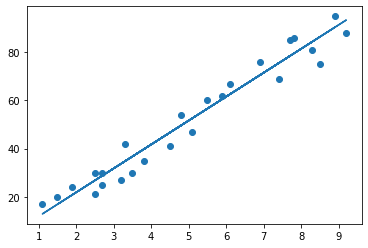

In [8]:
# Let's start processing towards the prediction

line = regression.coef_*hours + regression.intercept_
plt.scatter(hours, scores)
plt.plot(hours, line)
plt.show()

In [9]:
# Let's make prediction

print(hours_test)
scores_predicted = regression.predict(hours_test)
scores_predicted

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9


array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [10]:
#Final data after testing and training the model

final = pd.DataFrame({"Actual ": scores_test, "Prediction ": scores_predicted})
final

,Actual,Prediction
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


As we can see in the above table that there is a difference between the actual score and predicted score.
We need to chech the accuracy of our model using metrics library.

Since this is a regression based problem we can use 'coefficient of determination','root-mean-square error',
'mean-absolute error' or any similar quantities.

Here I am using the mean-absolute error


In [11]:
# Let's check the Accuracy of our model. For that we will import the metrics library from sklearn

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(scores_predicted, scores_test))

Mean Absolute Error:  4.130879918502486


Now we need to predict the output on the basis of given input.

In [12]:
# Let's test our model for a given input

prediction = regression.predict([[6.5]])
prediction

array([66.55311346])

The final step is to make our model ask the user for input and than predict the output on the basis of the given input.

In [15]:
# Now we will make our model which can predict marks according to the User's input

hrs = float(input("Enter hours: "))
prediction = regression.predict([[hrs]])
print("If you read for ", hrs, " hours ", "you will score ",prediction," percentage in your examination")


Enter hours: 9.25
If you read for  9.25  hours  you will score  [93.89272889]  percentage in your examination
